# OIL AND GAS IN THE EAGLEFORD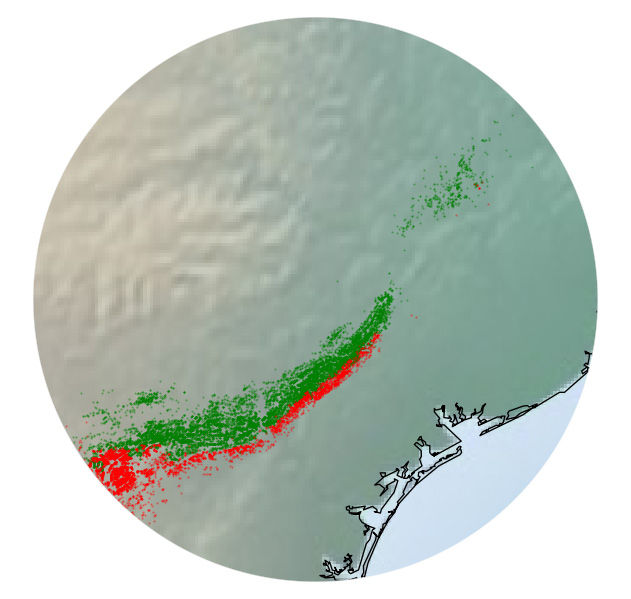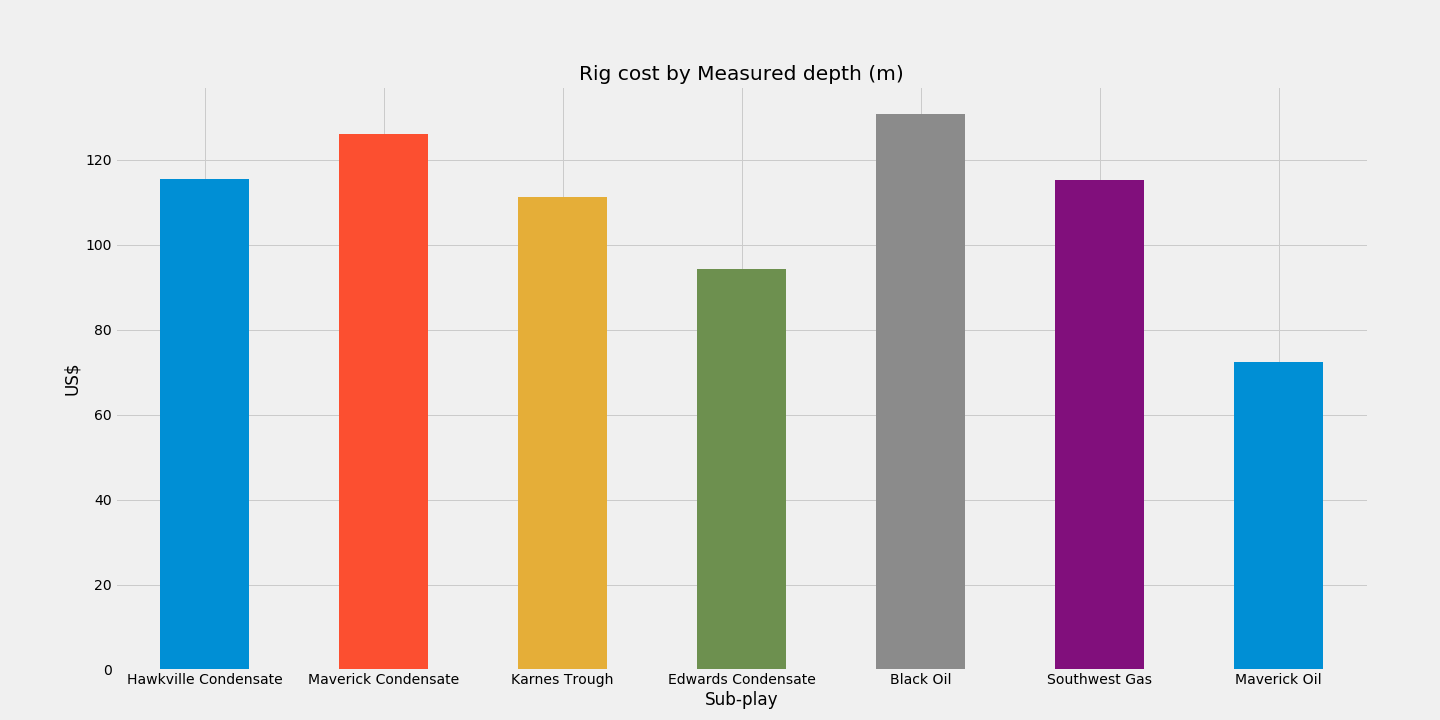


#### We're a burgeoning exploration company seeking funding for an Eagleford asset.  Investing in a quality area is our primary concern, areas producing large amounts of oil over gas areas.  Costs are important, and are prohibitive at exorbatant levels.  Furthermore, areas of high well and operator activity are not only indicative of geologically sound areas, but also have more data on crilling and completion costs and methods.

# LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import matplotlib
from mpl_toolkits.basemap import Basemap
import requests
import openpyxl as xl

% matplotlib inline

# DATA CLEANING

In [2]:
#Import and read xlsx file into a dataframe 
file = "Eagle Ford Data.xlsx"
df = pd.read_excel(file, sheet_name=0)

In [3]:
#Get a list of columns to see which ones are irrelevant 
df.columns

Index(['API', 'Longitude', 'Latitude', 'Bottomhole longitude',
       'Bottomhole latitude', 'Well Number', 'Lease Name', 'Well Type',
       'Permit Type', 'Pad', 'Operator', 'Operator (Subsidiary)',
       'Operator (Original)', 'Operator Thematic Group', 'Operator US Focus',
       'Play', 'Sub-play', 'State', 'County', 'Region', 'Basin', 'Reservoir',
       'Field', 'Permit Date', 'Drilling Start Date', 'Drilling End Date',
       'Completion Date', 'First Production Date', 'IP Date',
       'Vertical Depth (m)', 'Measured Depth (m)', 'Lateral Length (m)',
       'Drilling Days (days)', 'Drilling Speed (m/day)',
       'Fracture Stages (stages)', 'Water (l)', 'Proppant (kg)',
       'API Gravity (degree)', 'Well Cost Total (US$)', 'Rig Cost (US$)',
       'Casing Cost (US$)', 'Water Cost (US$)', 'Proppant Cost (US$)',
       'Pumping Cost (US$)', 'Other Cost (US$)', 'Cum30 Oil (bbl)',
       'Cum60 Oil (bbl)', 'Cum90 Oil (bbl)', 'Cum180 Oil (bbl)',
       'Cum365 Oil (bbl)', 'Cum30

In [4]:
#Drop irrelevant columns
df_subset = df.drop(columns = ['Bottomhole longitude','Bottomhole latitude', 'Well Number', 'Lease Name',
       'Permit Type', 'Pad','Operator (Subsidiary)', 'Operator Thematic Group', 'Operator US Focus', 'Play', 'State', 'Region', 'Basin',
       'Field', 'Permit Date', 'Drilling Start Date', 'Drilling End Date',
       'Completion Date','Fracture Stages (stages)','Cum30 Oil (bbl)',
       'Cum60 Oil (bbl)', 'Cum90 Oil (bbl)', 'Cum30 Gas (mcf)', 'Cum60 Gas (mcf)',
       'Cum90 Gas (mcf)','Cum30 Total (boe)', 'Cum60 Total (boe)', 'Cum90 Total (boe)',
       'Cum180 Total (boe)','bi Oil', 'Di Oil (per month)',
       'Dmin Oil (per year)', 'bi Gas', 'Di Gas (per month)',
       'Dmin Gas (per year)', 'Reservoir', 'Water (l)', 'IP Date'])

In [5]:
#Check if there are duplicate values in API column
df_subset.API.duplicated().sum
#Check data types 
types = df_subset.dtypes
types

API                                int64
Longitude                        float64
Latitude                         float64
Well Type                         object
Operator                          object
Operator (Original)               object
Sub-play                          object
County                            object
First Production Date     datetime64[ns]
Vertical Depth (m)               float64
Measured Depth (m)               float64
Lateral Length (m)               float64
Drilling Days (days)             float64
Drilling Speed (m/day)           float64
Proppant (kg)                    float64
API Gravity (degree)             float64
Well Cost Total (US$)            float64
Rig Cost (US$)                   float64
Casing Cost (US$)                float64
Water Cost (US$)                 float64
Proppant Cost (US$)              float64
Pumping Cost (US$)               float64
Other Cost (US$)                 float64
Cum180 Oil (bbl)                 float64
Cum365 Oil (bbl)

In [6]:
#check shape
df_subset.shape

(17882, 34)

In [7]:
#Dropping rows that contain less than half of observations
df_subset = df_subset.dropna(thresh=16)

#Return a list of columns with missing values
columns = df_subset.columns[df_subset.isnull().any()]

#Fill missing values with average values for that column
for column in columns:
    df_subset[column].fillna(df_subset.groupby("Sub-play")[column].transform("mean"), inplace=True)


In [8]:
#Confirm there are no missing values 
df_subset.isnull().any()

#There are, so fill in with means for that column
cols = ["Well Cost Total (US$)", "Rig Cost (US$)", "Casing Cost (US$)",  
       "Water Cost (US$)", "Proppant Cost (US$)", "Pumping Cost (US$)", "Other Cost (US$)"]
for col in cols:
    df_subset[col].fillna(df_subset[col].mean(), inplace=True)  

In [9]:
#Check again
df_subset.isnull().any()

API                       False
Longitude                 False
Latitude                  False
Well Type                 False
Operator                  False
Operator (Original)       False
Sub-play                  False
County                    False
First Production Date     False
Vertical Depth (m)        False
Measured Depth (m)        False
Lateral Length (m)        False
Drilling Days (days)      False
Drilling Speed (m/day)    False
Proppant (kg)             False
API Gravity (degree)      False
Well Cost Total (US$)     False
Rig Cost (US$)            False
Casing Cost (US$)         False
Water Cost (US$)          False
Proppant Cost (US$)       False
Pumping Cost (US$)        False
Other Cost (US$)          False
Cum180 Oil (bbl)          False
Cum365 Oil (bbl)          False
Cum180 Gas (mcf)          False
Cum365 Gas (mcf)          False
Cum365 Total (boe)        False
IP Oil (b/d)              False
IP Gas (mmcfd)            False
IP Total (boe/d)          False
EUR Oil 

In [10]:
#Saving clean data to a csv
df_subset.to_csv("clean_data.csv", sep=',', index = False)

# AREAS

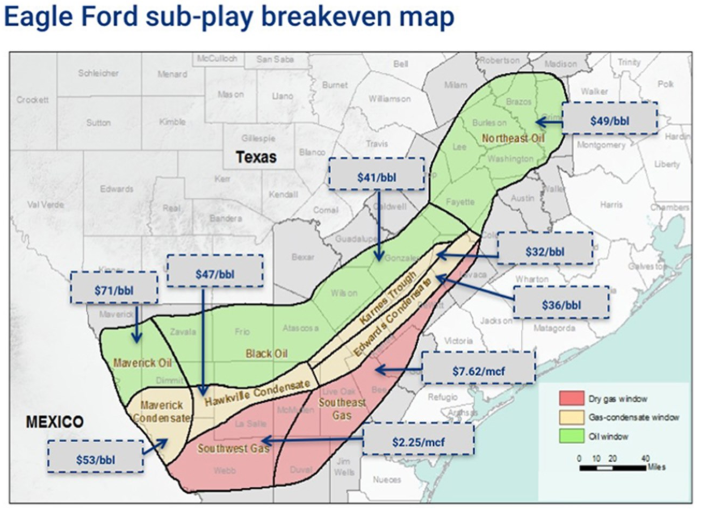

# OPERATOR ACTIVITY

# PRODUCTION

# By Sub-Play

In [11]:
#reading file into a dataframe
file = "clean_data.csv"
df = pd.read_csv(file)

In [12]:
#Overview of Eagle Ford Play
summary = df.groupby(['Sub-play'])['Operator', "API"].nunique()
summary = summary.rename(columns = {"API": "Well count", "Operator": "Operator Count"})



Index(['Operator Count', 'Well count'], dtype='object')

In [13]:
#Overview of Eagle Ford Play
#Calculating summary statistics for each sub-play

agg = {
    'Well Cost Total (US$)': {'Avg Well cost': 'mean'}, 
    'Rig Cost (US$)': {'Avg Rig Cost (US$)':'mean'}, 
    'EUR Total (mmboe)':{'Avg EUR (mmboe)': 'mean'},
    'Cum365 Gas (mcf)': {'Avg Cum365 Gas (mcf)': 'mean', 'Max Cum365 Gas (mcf)': max},
    'Cum365 Oil (bbl)': {'Avg Cum365 Oil (bbl)': 'mean', 'Max Cum365 Oil (bbl)': max}

}


summary_1 = df.groupby(['Sub-play']).agg(agg)
#when you groupby with an aggregate function it creates index on top of index, drop level drops this.
summary_1.columns = summary_1.columns.droplevel()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:4658: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [15]:
#Merging two dataframs into one to get an overview of Eagle Ford Play by Sub-play:
summary_final  = pd.merge(summary, summary_1, left_index=True, right_index=True)
summary_final.columns


Index(['Operator Count', 'Well count', 'Avg Well cost', 'Avg Rig Cost (US$)',
       'Avg EUR (mmboe)', 'Avg Cum365 Gas (mcf)', 'Max Cum365 Gas (mcf)',
       'Avg Cum365 Oil (bbl)', 'Max Cum365 Oil (bbl)'],
      dtype='object')

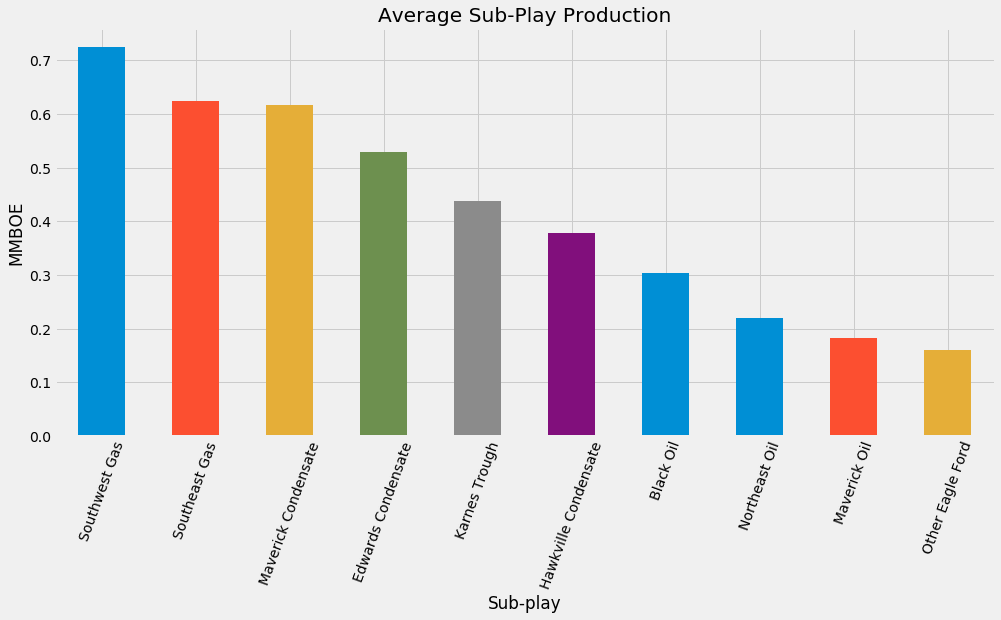

In [16]:
# Plot total cost averages
with plt.style.context('fivethirtyeight'):
    summary_final.sort_values('Avg EUR (mmboe)', ascending = False, inplace = True)
    summary_final['Avg EUR (mmboe)'].plot(kind='bar',figsize=(15, 7),rot=70)

    # Add axis labels and title
    plt.title("Average Sub-Play Production")
    plt.ylabel("MMBOE")

    # Show plot
    plt.show()

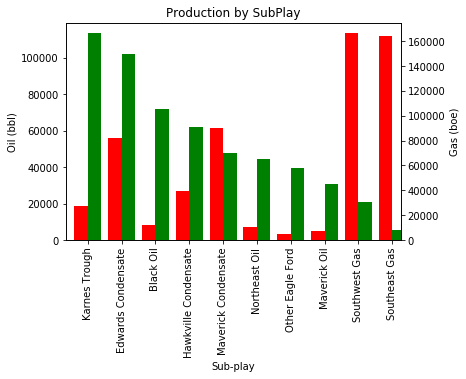

In [42]:
# Plot categorical costs 

summary_final.sort_values('Avg Cum365 Oil (bbl)', ascending = False, inplace = True)
fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx()
width = 0.4
summary_final.loc[:,'Avg Cum365 Oil (bbl)'].plot(kind='bar', color='green', ax=ax, width=width, position=0)
(summary_final.loc[:,'Avg Cum365 Gas (mcf)']/6).plot(kind='bar', color='red', ax=ax2, width=width, position=1)
    
# Add axis labels and title
plt.title("Production by SubPlay")
ax.set_ylabel("Oil (bbl)")
ax2.set_ylabel("Gas (boe)")

# Show plot
plt.show()

#### Karnes Trough and Edwards Condensate are more oil rich. It would be nice to have a better way to show the amount of gas contributing to BOE.

#### Enter a production graph

#### Enter a production graph

# By Something Else

# COSTS

In [34]:
#import cleaned csv
eagleford_df = pd.read_csv(file)

In [35]:
# Build cost data frame
cost_df = pd.DataFrame({
                       'Sub-play':eagleford_df['Sub-play'],
                       'County':eagleford_df['County'],
                       'Well Cost Total (US$)':eagleford_df['Well Cost Total (US$)'],
                       'Rig Cost (US$)':eagleford_df['Rig Cost (US$)'],
                       'Water Cost (US$)':eagleford_df['Water Cost (US$)'],
                       'Proppant Cost (US$)':eagleford_df['Proppant Cost (US$)'],
                       'Pumping Cost (US$)':eagleford_df['Pumping Cost (US$)'],
                       'Other Cost (US$)':eagleford_df['Other Cost (US$)'],
                       'DrillingCost' :eagleford_df['Other Cost (US$)'] + eagleford_df['Rig Cost (US$)'],
                       'CompletionCost' :eagleford_df['Proppant Cost (US$)'] + eagleford_df['Water Cost (US$)'] + eagleford_df['Pumping Cost (US$)'], 
                       'MD_Ft' :eagleford_df['Measured Depth (m)']/ 3.28084,
                       'LL_Ft' :eagleford_df['Lateral Length (m)']/ 3.28084
                       })

In [36]:
# Drop rows with missing cost data
cost_df = cost_df.dropna(axis=0,how='any')

In [37]:
#drilling cost per ft
cost_df['DrillCostPerFt'] = cost_df['DrillingCost']/cost_df['MD_Ft']
#completions cost per ft
cost_df['CompCostPerFt'] = cost_df['DrillingCost']/cost_df['LL_Ft'] 

In [38]:
# Calculate average costs
cost_avg = cost_df.groupby('Sub-play').mean()

# Total Cost by Sub-Play

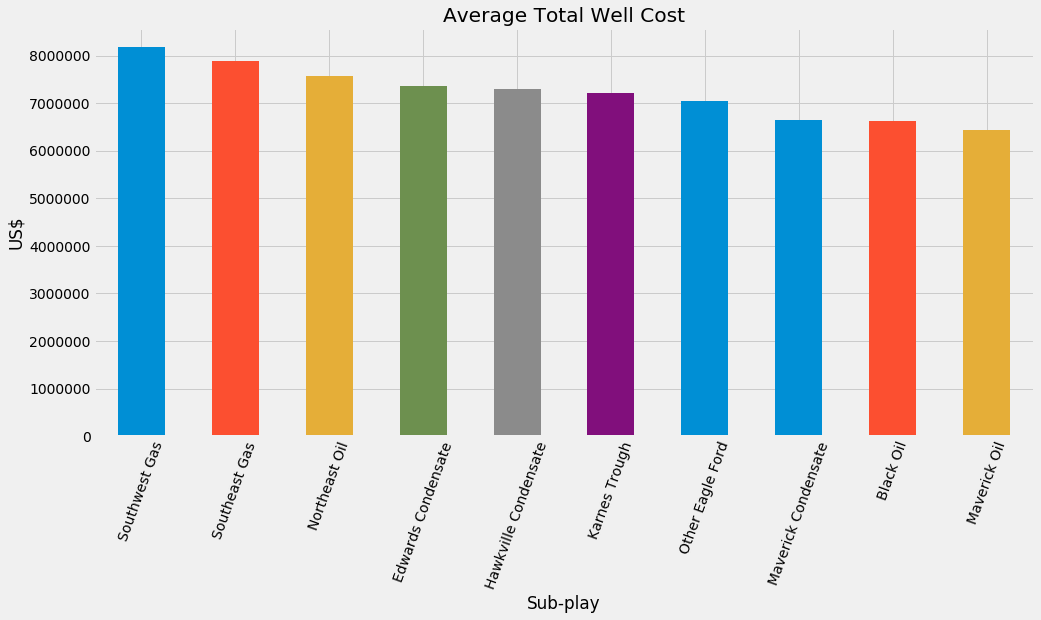

In [25]:
# Plot total cost averages
with plt.style.context('fivethirtyeight'):
    cost_avg.sort_values('Well Cost Total (US$)', ascending = False, inplace = True)
    cost_avg['Well Cost Total (US$)'].plot(kind='bar',figsize=(15, 7),rot=70)

    # Add axis labels and title
    plt.title("Average Total Well Cost")
    plt.ylabel("US$")

    # Show plot
    plt.show()

# Drilling Costs Normalize to MD

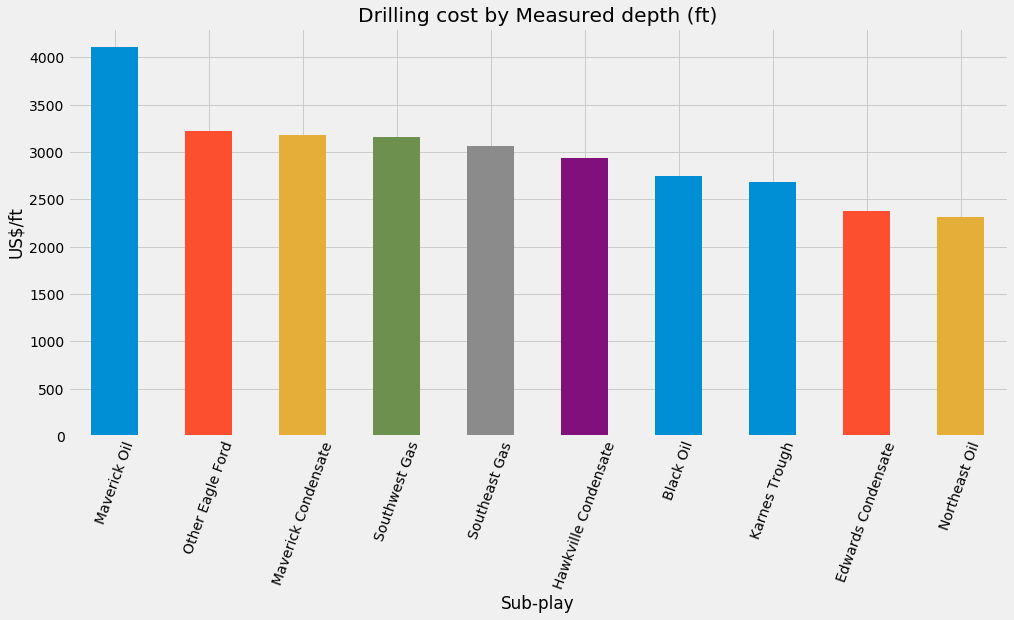

In [39]:
# Plot total cost cost averages
with plt.style.context('fivethirtyeight'):
    cost_avg.sort_values('DrillCostPerFt', ascending = False, inplace = True)
    cost_avg['DrillCostPerFt'].plot(kind='bar',figsize=(15, 7),rot=70)

    # Add axis labels and title
    plt.title("Drilling cost by Measured depth (ft)")
    plt.ylabel("US$/ft")

     # Save Figure
    plt.savefig("Drilling Cost Per Foot.png")
    
    plt.show()

###### The Maverick region overall looks to be the most expensive areas.  Other Eagle Ford could be wildcats and other areas not benefitting from development mode cost reductions.

# Completions Normalize to MD

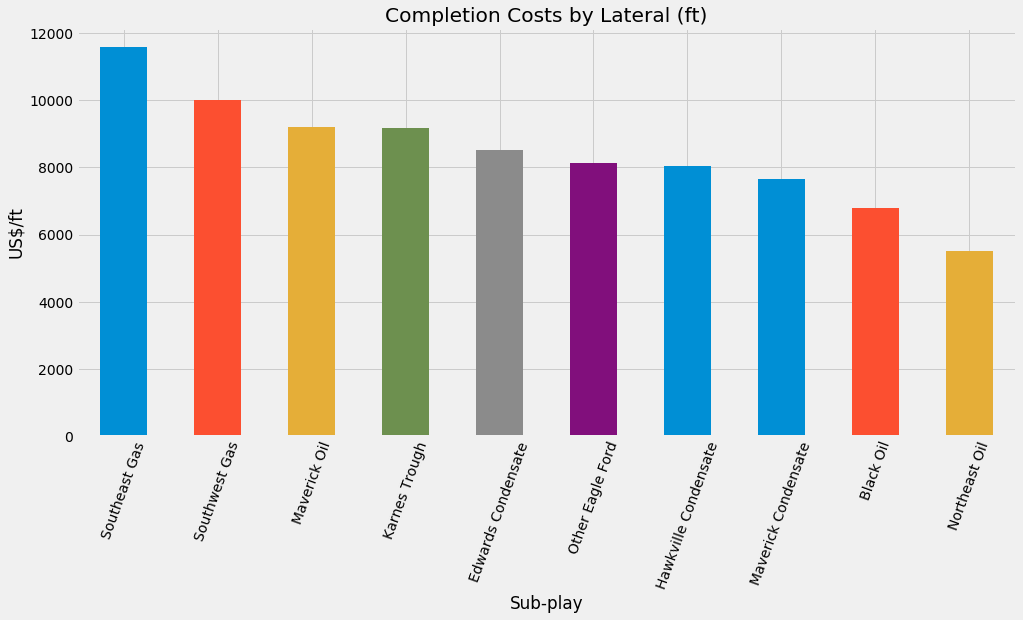

In [42]:
# Plot total cost cost averages
with plt.style.context('fivethirtyeight'):
    cost_avg.sort_values('CompCostPerFt', ascending = False, inplace = True)
    cost_avg['CompCostPerFt'].plot(kind='bar',figsize=(15, 7),rot=70)

    # Add axis labels and title
    plt.title("Completion Costs by Lateral (ft)")
    plt.ylabel("US$/ft")

     # Save Figure
    plt.savefig("Completion Cost Per Foot.png")
    
    plt.show()

###### Water, Proppant, and Pumping Cost are indicative of completion methods.  Historically, completions have increased with time.

###### The Maverick Oil Sub-Play is the most expensive area on average.

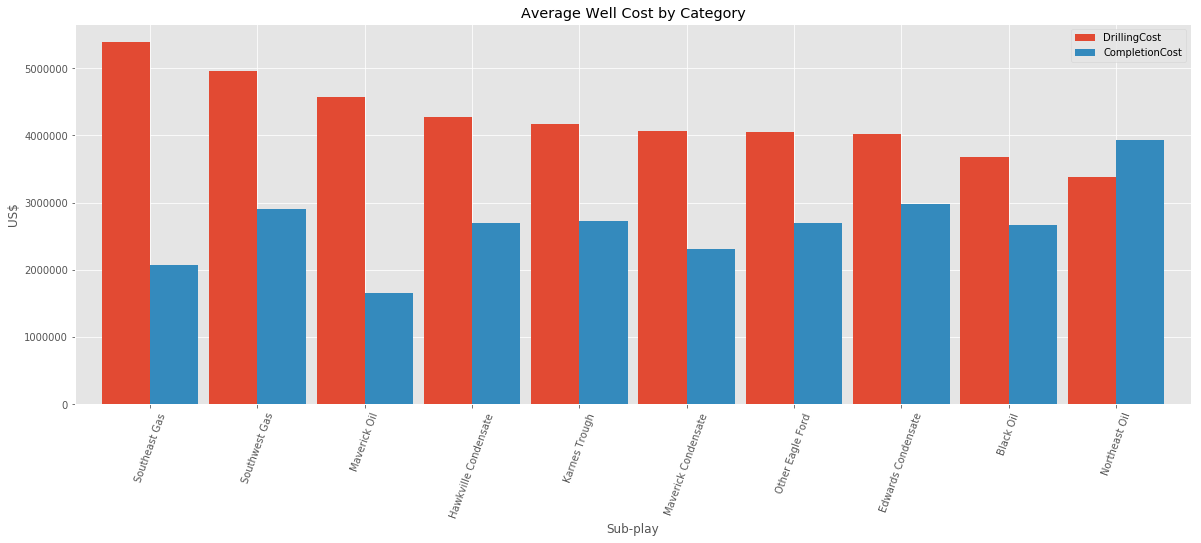

In [47]:
# Plot categorical costs 
with plt.style.context('ggplot'):
    cost_avg.sort_values('DrillingCost', ascending = False, inplace = True)
    cost_avg.loc[:,'DrillingCost':'CompletionCost'].plot(kind='bar',figsize=(20, 7),rot=70,width=.9)

    # Add axis labels and title
    plt.title("Average Well Cost by Category")
    plt.ylabel("US$")

    # Show plot
    plt.show()

#### The two major gas fields are the most expensive to drill.  Maverick Oil has the most expensive completion methods.

In [21]:
#ENTER STACKED BAR OR STACK THE COMPLAETIONS ABOVE
#https://stackoverflow.com/questions/49889398/plot-stacked-bar-chart-from-pandas-data-frame

# Costs #2

# DEPTHS

In [26]:
# Import Excel file into data frame
eagleford_df = pd.read_excel("Eagle Ford Data.xlsx")

In [27]:
eagleford_df.columns.tolist()

['API',
 'Longitude',
 'Latitude',
 'Bottomhole longitude',
 'Bottomhole latitude',
 'Well Number',
 'Lease Name',
 'Well Type',
 'Permit Type',
 'Pad',
 'Operator',
 'Operator (Subsidiary)',
 'Operator (Original)',
 'Operator Thematic Group',
 'Operator US Focus',
 'Play',
 'Sub-play',
 'State',
 'County',
 'Region',
 'Basin',
 'Reservoir',
 'Field',
 'Permit Date',
 'Drilling Start Date',
 'Drilling End Date',
 'Completion Date',
 'First Production Date',
 'IP Date',
 'Vertical Depth (m)',
 'Measured Depth (m)',
 'Lateral Length (m)',
 'Drilling Days (days)',
 'Drilling Speed (m/day)',
 'Fracture Stages (stages)',
 'Water (l)',
 'Proppant (kg)',
 'API Gravity (degree)',
 'Well Cost Total (US$)',
 'Rig Cost (US$)',
 'Casing Cost (US$)',
 'Water Cost (US$)',
 'Proppant Cost (US$)',
 'Pumping Cost (US$)',
 'Other Cost (US$)',
 'Cum30 Oil (bbl)',
 'Cum60 Oil (bbl)',
 'Cum90 Oil (bbl)',
 'Cum180 Oil (bbl)',
 'Cum365 Oil (bbl)',
 'Cum30 Gas (mcf)',
 'Cum60 Gas (mcf)',
 'Cum90 Gas (mcf)',
 

In [28]:
# Build cumulative BOE data frame
cum_boe_df = pd.DataFrame({
                           'Sub-play':eagleford_df['Sub-play'],
                           'Cum30 Total (boe)':eagleford_df['Cum30 Total (boe)'],
                           'Cum60 Total (boe)':eagleford_df['Cum60 Total (boe)'],
                           'Cum90 Total (boe)':eagleford_df['Cum90 Total (boe)'],
                           'Cum180 Total (boe)':eagleford_df['Cum180 Total (boe)'],
                           'Cum365 Total (boe)':eagleford_df['Cum365 Total (boe)'],
                           'Lateral Length (m)':eagleford_df['Lateral Length (m)']
                           })

In [29]:
# Drop rows with missing cumulative data
cum_boe_df = cum_boe_df.dropna(axis=0,how='any')

In [30]:
# Create labels and bins 
bins = np.arange(cum_boe_df['Lateral Length (m)'].min(),cum_boe_df['Lateral Length (m)'].max(),200)
bins = bins + 0.9
labels = []
for i in range(len(bins)):
    if i == 0:
        labels.append('<'+str(int(bins[i])))
    elif i == len(bins)-1:
        labels.append('>'+str(int(bins[i])))
    else:
        labels.append(str(int(bins[i-1]))+"-"+str(int(bins[i])))
#labels = labels[1:]
print(labels)
print(bins)

['<235', '235-435', '435-635', '635-835', '835-1035', '1035-1235', '1235-1435', '1435-1635', '1635-1835', '1835-2035', '2035-2235', '2235-2435', '2435-2635', '2635-2835', '2835-3035', '3035-3235', '3235-3435', '3435-3635', '3635-3835', '3835-4035', '4035-4235', '>4435']
[ 235.9  435.9  635.9  835.9 1035.9 1235.9 1435.9 1635.9 1835.9 2035.9
 2235.9 2435.9 2635.9 2835.9 3035.9 3235.9 3435.9 3635.9 3835.9 4035.9
 4235.9 4435.9]


In [31]:
eagleford_df.groupby('Sub-play')['Vertical Depth (m)'].describe()

,count,mean,std,min,25%,50%,75%,max
Sub-play,,,,,,,,
Black Oil,4137.0,2579.597534,385.529270,782.0,2331.00,2593.0,2836.00,3810.0
Edwards Condensate,2926.0,3864.936090,230.378778,336.0,3709.00,3908.0,4030.75,4342.0
Hawkville Condensate,2678.0,2945.298730,392.650645,811.0,2607.25,3016.0,3225.75,4055.0
Karnes Trough,3617.0,3488.448714,237.399489,1500.0,3332.00,3494.0,3666.00,4080.0
Maverick Condensate,3096.0,2352.382752,256.468821,227.0,2173.00,2384.0,2537.00,2991.0
Maverick Oil,143.0,1843.573427,252.846680,975.0,1698.00,1870.0,2006.00,3132.0
Northeast Oil,389.0,2608.601542,359.387850,1748.0,2345.00,2573.0,2820.00,3719.0
Other Eagle Ford,32.0,2499.812500,610.062685,725.0,2269.25,2419.0,2546.50,4006.0
Southeast Gas,45.0,4137.266667,233.058167,3336.0,3984.00,4077.0,4376.00,4483.0


###### The mean vertical depth is the average depth of operator's target geological formation.  Indicative of sub-plays with deepest exploitable zones.

In [33]:
eagleford_df.groupby('Sub-play')['Lateral Length (m)'].describe()

,count,mean,std,min,25%,50%,75%,max
Sub-play,,,,,,,,
Black Oil,4078.0,1865.967141,466.579111,202.0,1519.00,1796.0,2120.00,4307.0
Edwards Condensate,2919.0,1596.188421,320.021409,618.0,1380.00,1581.0,1807.00,4451.0
Hawkville Condensate,2666.0,1801.573518,355.263777,688.0,1540.25,1749.0,2004.75,3307.0
Karnes Trough,3614.0,1532.978141,327.481201,521.0,1320.00,1522.5,1716.75,2953.0
Maverick Condensate,3092.0,1799.161384,400.236136,763.0,1554.00,1702.0,2006.00,4543.0
Maverick Oil,142.0,1759.816901,449.826328,237.0,1431.75,1667.0,2152.25,2589.0
Northeast Oil,381.0,2070.965879,385.671528,382.0,1834.00,2068.0,2339.00,2968.0
Other Eagle Ford,31.0,1825.322581,450.263581,550.0,1648.50,1882.0,2102.00,2472.0
Southeast Gas,45.0,1545.688889,245.995179,822.0,1405.00,1504.0,1700.00,2095.0


###### The mean lateral length is the average horizontal distance each operator's drilled. Possibly indicative of formation homogeneity.

# Exploration

Text(0,0.5,'Drilling Speed')

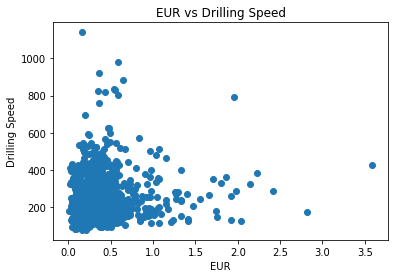

In [44]:
#EUR vs Max Temp Scatter

plt.scatter(cleaned_oil_df["EUR Total (mmboe)"], cleaned_oil_df["Drilling Speed (m/day)"])
plt.title("EUR vs Drilling Speed")
plt.xlabel('EUR')
plt.ylabel('Drilling Speed')

# MAPS

In [44]:
#differentiate between commodity
oil = df[(df['Well Type'] != 'Gas')]
gas = df[(df['Well Type'] == 'Gas')]

In [52]:
#Grab lat/longs for mapping
#lat/Longs for extent
lats = list(df['Latitude'])
lons = list(df['Longitude'])
boeSz = list(df['Cum365 Total (boe)'])
#Lat/longs for oil
olats = list(oil['Latitude'])
olons = list(oil['Longitude'])
#Lat/longs for gas
glats = list(gas['Latitude'])
glons = list(gas['Longitude'])

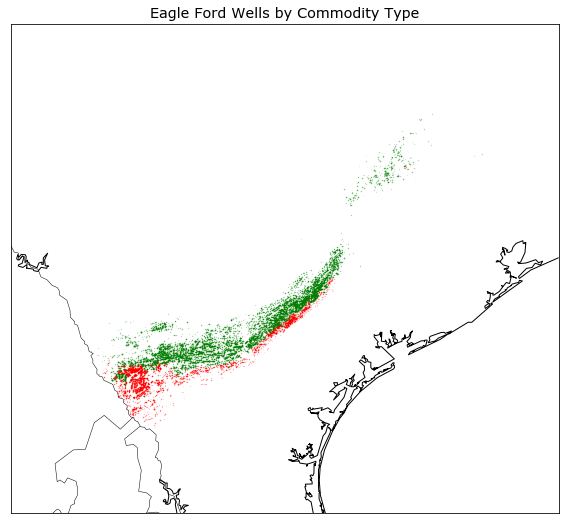

In [63]:
# setting parameters for title and axes
font = {'family' : 'verdana',
        'size'   : 12}
matplotlib.rc('font', **font)
   
# How much to zoom from coordinates (in degrees)
zoom_scale = 1

# Setup the bounding box for the zoom and bounds of the map
bbox = [np.min(lats)-zoom_scale,np.max(lats)+zoom_scale,\
        np.min(lons)-zoom_scale,np.max(lons)+zoom_scale]

fig, ax = plt.subplots(figsize=(15,9))
plt.title("Eagle Ford Wells by Commodity Type")
# Define the projection, scale, the corners of the map, and the resolution.
m = Basemap(projection='merc',llcrnrlat=bbox[0],urcrnrlat=bbox[1],\
            llcrnrlon=bbox[2],urcrnrlon=bbox[3],lat_ts=10,resolution='i')

# Draw coastlines and fill continents and water with color
m.drawcoastlines()
m.drawstates()
m.drawcountries()
#m.etopo()
#m.shadedrelief()

min_marker_size = 0.01

for i in range(len(glons)):
#for i in range(100):
    x,y = m(float(glons[i]), float(glats[i]))
    msize = (boeSz[i]/5000)*min_marker_size
    m.plot(x, y, marker = 'o', c='red', markersize=msize, alpha=0.5, latlon=False)

for i in range(len(olons)):
#for i in range(100):
    x,y = m(float(olons[i]), float(olats[i]))
    msize = (boeSz[i]/5000)*min_marker_size
    m.plot(x, y, marker = 'o', c='green', markersize=msize, alpha=0.5, latlon=False)
 

# save the figure and show it
plt.savefig('EagleFordWells.png', format='png', dpi=96, transparent=True)
plt.show()